In [2]:
import numpy as np 
import pandas as pd 
import os

import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.merge import add
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization

from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,recall_score
from keras.metrics import categorical_accuracy
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator


In [3]:
from tensorflow import set_random_seed
os.environ['PYTHONHASHSEED'] = "0"
np.random.seed(1)
set_random_seed(2)

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",input_shape=(224,224,3),name='conv1_1'))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", padding="same",name='conv1_2'))
model.add(MaxPooling2D(pool_size=(2,2),name='pool1'))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same",name='conv2_1'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding="same",name='conv2_2'))
model.add(MaxPooling2D(pool_size=(2,2),name='pool2'))

model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same",name='conv3_1'))
model.add(BatchNormalization(name='bn3_1'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same",name='conv3_2'))
model.add(BatchNormalization(name='bn3_2'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding="same",name='conv3_3'))
model.add(MaxPooling2D(pool_size=(2,2),name='pool3'))

model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv4_1'))
model.add(BatchNormalization(name='bn4_1'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv4_2'))
model.add(BatchNormalization(name='bn4_2'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv4_3'))
model.add(MaxPooling2D(pool_size=(2,2),name='pool4'))

# model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv5_1'))
# # model.add(BatchNormalization(name='bn5_1'))
# model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv5_2'))
# # model.add(BatchNormalization(name='bn5_2'))
# model.add(Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding="same",name='conv5_3'))
# model.add(MaxPooling2D(pool_size=(2,2),name='pool5'))

model.add(Flatten(name='flatten'))
model.add(Dense(1024,activation="relu",name='fc1'))
model.add(Dropout(rate=0.7,name='dropout1'))
model.add(Dense(512,activation="relu",name='fc2'))
model.add(Dropout(rate=0.5,name='dropout2'))
model.add(Dense(2,activation="softmax",name='fc3'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 224, 224, 32)      896       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 224, 224, 32)      9248      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2_1 (Conv2D)             (None, 112, 112, 128)     36992     
_________________________________________________________________
conv2_2 (Conv2D)             (None, 112, 112, 128)     147584    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 56, 56, 128)       0         
_________________________________________________________________
conv3_1 (Conv2D)             (None, 56, 56, 256)       295168    
__________

In [5]:
learning_rate = 5e-5
epochs = 3
model.compile(Adam(lr=learning_rate),loss="categorical_crossentropy", metrics=["accuracy"])
model.load_weights("my_model_vgg16_14.h5")

In [6]:
model.layers

In [7]:

from vis.utils import utils
from keras import activations

layer_idx = utils.find_layer_idx(model, 'fc3')

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/yuanyuan/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


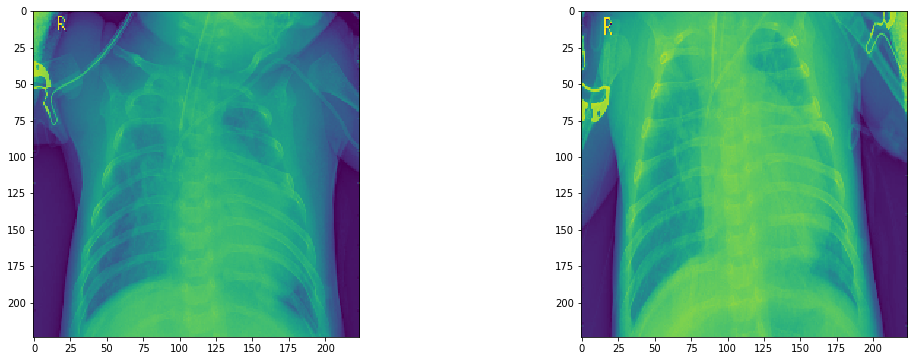

In [ ]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = utils.load_img('person1_virus_6.jpeg', target_size=(224, 224))
img2 = utils.load_img('person1_virus_7.jpeg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [ ]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'fc2')

# f, ax = plt.subplots(1, 2)
# for i, img in enumerate([img1, img2]):    
#     # 20 is the imagenet index corresponding to `ouzel`
#     grads = visualize_saliency(model, layer_idx, filter_indices=1, seed_input=img)
    
#     # visualize grads as heatmap
#     ax[i].imshow(grads, cmap='jet')

grads = visualize_saliency(model, layer_idx, filter_indices=1, seed_input=img1)
ax[i].imshow(grads, cmap='jet')